In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import torch

from nionswift_plugin.nionswift_structure_recognition.model import load_preset_model
from nionswift_plugin.nionswift_structure_recognition.scale import RealSpaceCalibrator

from tqdm.auto import tqdm
from psm.graph import stable_delaunay_graph
from psm.rmsd import pairwise_rmsd
from psm.geometry import regular_polygon
from psm.select import select_nodes_in_faces, select_faces_around_nodes
from psm.structures.graphene import defect_fingerprint
from skimage.transform import downscale_local_mean

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
#device=torch.device('cpu')
device = torch.device('cuda:0')
model = load_preset_model('graphene', device=device)

In [5]:
image = np.load('test_image.npy')

In [19]:
model(image, .1)

77439.37527955227


{'points': array([[ 6.9100e+02,  9.2200e+02],
        [ 6.7900e+02,  9.2400e+02],
        [ 6.7600e+02,  9.3900e+02],
        ...,
        [ 1.5480e+02,  4.2000e+02],
        [ 1.4000e+02,  4.2427e+02],
        [-2.0000e-01,  1.7800e+02]]),
 'labels': array([1, 1, 1, ..., 2, 2, 2], dtype=int64),
 'density': array([[0.4527, 0.5069, 0.5273, ..., 0.6069, 0.6965, 0.589 ],
        [0.4638, 0.3879, 0.3002, ..., 0.6541, 0.701 , 0.6832],
        [0.3863, 0.2419, 0.2007, ..., 0.6088, 0.6479, 0.6835],
        ...,
        [0.6544, 0.6521, 0.5948, ..., 0.2253, 0.3481, 0.4096],
        [0.6803, 0.7225, 0.6803, ..., 0.3364, 0.4487, 0.4714],
        [0.6092, 0.6764, 0.6091, ..., 0.486 , 0.5129, 0.4624]], dtype=float32),
 'segmentation': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 'sampling': 0.1}

In [20]:
torch.cuda.max_memory_allocated(device=device) #* 1e-9

1448010752

59.978535


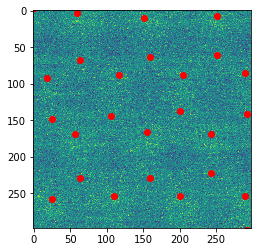

In [53]:

output = model(image, .02833)

points = output['points']
density = output['density']

plt.plot(*points.T,'ro')
plt.imshow(image)
#image.shape

56.548667764616276

In [48]:
#from skimage.filters import threshold_otsu

t = torch.tensor(image)

threshold_otsu(t)

#print(bin_centers)


#plt.plot(hist.numpy())

# hist = hist.astype(float)

# # class probabilities for all possible thresholds
# weight1 = np.cumsum(hist)
# weight2 = np.cumsum(hist[::-1])[::-1]
# # class means for all possible thresholds
# mean1 = np.cumsum(hist * bin_centers) / weight1
# mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]

# # Clip ends to align class 1 and class 2 variables:
# # The last value of ``weight1``/``mean1`` should pair with zero values in
# # ``weight2``/``mean2``, which do not exist.
# variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# idx = np.argmax(variance12)
# threshold = bin_centers[:-1][idx]

#t

6.1006317138671875

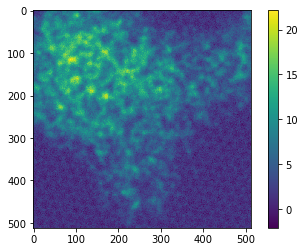

In [41]:
plt.imshow(image)
plt.colorbar()

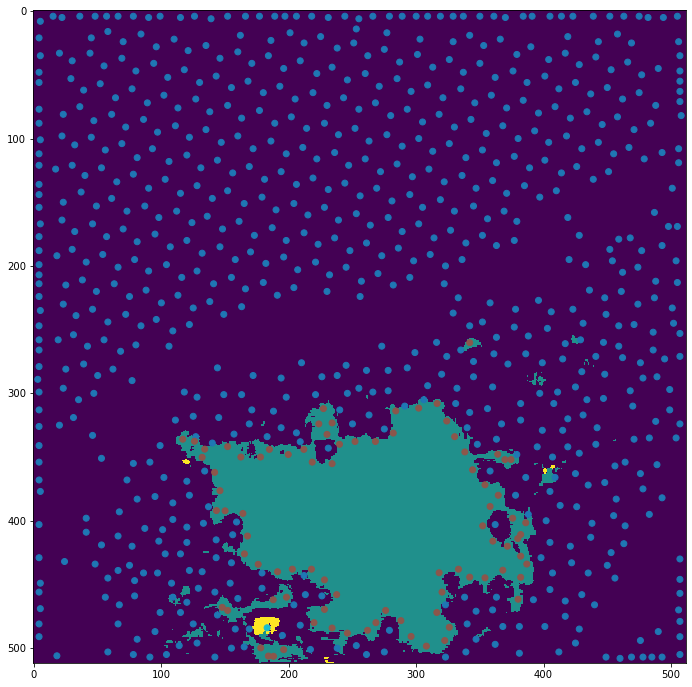

In [17]:
#for i in tqdm(range(100)):
sampling = .1
output = model(image, sampling)

segmentation = output['segmentation']
points = output['points']
labels = output['labels']

plt.figure(figsize=(12,12))
plt.imshow(segmentation)
plt.scatter(*points.T,c=labels,cmap='tab10')